In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_colwidth', 200)

In [ ]:
filename = '/content/drive/MyDrive/NLP/complaints.csv'
try:
    df = pd.read_csv(filename)
    print(f"Successfully loaded {len(df)} rows from {filename}.")
except FileNotFoundError:
    print(f"ERROR: File '{filename}' not found.")
    print("Please make sure the unzipped CSV is in the same folder as this notebook.")
    raise

Successfully loaded 12218152 rows from /content/drive/MyDrive/NLP/complaints.csv.


In [ ]:
df.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,12218152,12218152,11982857,12218146,11348306,3537241,6335321,12218152,12160526,12187923,685227,10305994,12218152,12218152,12218132,12218152,768284,1.221815e+07
unique,5111,21,86,178,272,2382420,11,7792,63,35578,3,4,7,5060,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681.\n\n15 U.S.C 1681 ...,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-09-11,Closed with explanation,Yes,No,NaN
freq,34092,7187113,9299774,5015563,3305321,26244,6010090,3155080,1650174,206807,431371,6411149,11610300,49545,6991664,12133623,619906,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.772900e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.667357e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.154188e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000455e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.367817e+07


In [ ]:
df.sample()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
11411587,2025-09-22,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't recognize,NaN,NaN,"EQUIFAX, INC.",HI,967XX,NaN,NaN,Web,2025-09-22,Closed with explanation,Yes,NaN,16079729


In [ ]:
df.shape

(12218152, 18)

In [ ]:
df.info

<bound method DataFrame.info of          Date received  \
0           2020-07-06   
1           2025-11-25   
2           2025-10-14   
3           2025-10-26   
4           2025-10-10   
...                ...   
12218147    2014-04-21   
12218148    2019-07-26   
12218149    2019-05-22   
12218150    2019-06-03   
12218151    2021-11-03   

                                                                               Product  \
0         Credit reporting, credit repair services, or other personal consumer reports   
1                                  Credit reporting or other personal consumer reports   
2                                  Credit reporting or other personal consumer reports   
3                                  Credit reporting or other personal consumer reports   
4                                  Credit reporting or other personal consumer reports   
...                                                                                ...   
12218147                                                                   Credit card   
12218148                                                                      Mortgage   
12218149  Credit reporting, credit repair services, or other personal consumer reports   
12218150  Credit reporting, credit repair services, or other personal consumer reports   
12218151  Credit reporting, credit repair services, or other personal consumer reports   

                         Sub-product  \
0                   Credit reporting   
1                   Credit reporting   
2                   Credit reporting   
3                   Credit reporting   
4                   Credit reporting   
...                              ...   
12218147                         NaN   
12218148  Conventional home mortgage   
12218149            Credit reporting   
12218150            Credit reporting   
12218151            Credit reporting   

                                                                                     Issue  \
0                                                     Incorrect information on your report   
1                                                     Incorrect information on your report   
2                                                     Incorrect information on your report   
3                                                     Incorrect information on your report   
4                                                     Incorrect information on your report   
...                                                                                    ...   
12218147                                                                             Other   
12218148                                                        Struggling to pay mortgage   
12218149                                              Incorrect information on your report   
12218150  Problem with a credit reporting company's investigation into an existing problem   
12218151                                                       Improper use of your report   

                                                        Sub-issue  \
0                             Information belongs to someone else   
1                             Information belongs to someone else   
2             Information is missing that should be on the report   
3                             Information belongs to someone else   
4                             Information belongs to someone else   
...                                                           ...   
12218147                                                      NaN   
12218148                                                      NaN   
12218149                      Information belongs to someone else   
12218150  Their investigation did not fix an error on your report   
12218151            Reporting company used your report improperly   

                                                                                                                                       

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df.dtypes

,0
Date received,object
Product,object
Sub-product,object
Issue,object
Sub-issue,object
Consumer complaint narrative,object
Company public response,object
Company,object
State,object
ZIP code,object


In [ ]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-11-25,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30311,NaN,NaN,Web,2025-11-25,In progress,Yes,NaN,17487731
2,2025-10-14,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information is missing that should be on the report,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
3,2025-10-26,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,93619,NaN,NaN,Web,2025-10-26,In progress,Yes,NaN,16826857
4,2025-10-10,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707


In [ ]:
df.tail(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
12218147,2014-04-21,Credit card,NaN,Other,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,CA,92003,NaN,NaN,Web,2014-04-21,Closed with monetary relief,Yes,No,816552
12218148,2019-07-26,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,NaN,NaN,JPMORGAN CHASE & CO.,NaN,NaN,NaN,NaN,Referral,2019-07-29,Closed with explanation,Yes,NaN,3322081
12218149,2019-05-22,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NaN,NaN,NaN,Consent not provided,Web,2019-05-22,Closed with explanation,Yes,NaN,3249858
12218150,2019-06-03,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NaN,NaN,NaN,Consent not provided,Web,2019-06-03,Closed with non-monetary relief,Yes,NaN,3262839
12218151,2021-11-03,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"The consumer reporting agency, XXXX, has furnished my consumer report without my authorization. And gained monetary benefit by selling my information to another consumer reporting Agency. This hap...",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",NaN,XXXXX,NaN,Consent provided,Web,2021-11-03,Closed with explanation,Yes,NaN,4869328


In [ ]:
# Missing values
df.isnull().sum()
(df.isnull().sum()/len(df))*100

,0
Date received,0.000000
Product,0.000000
Sub-product,1.925782
Issue,0.000049
Sub-issue,7.119293
Consumer complaint narrative,71.049296
Company public response,48.148288
Company,0.000000
State,0.471643
ZIP code,0.247411


In [ ]:
# Duplicate values
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

In [ ]:
df['Product'].value_counts().head(10)
df['Issue'].value_counts().head(10)
df['Company'].value_counts().head(10)
df['State'].value_counts().head(10)
df['Submitted via'].value_counts()

,count
Submitted via,
Web,11610300
Referral,266529
Phone,208127
Postal mail,105875
Fax,25657
Web Referral,1240
Email,424


Text(0.5, 1.0, 'Top 10 Products')

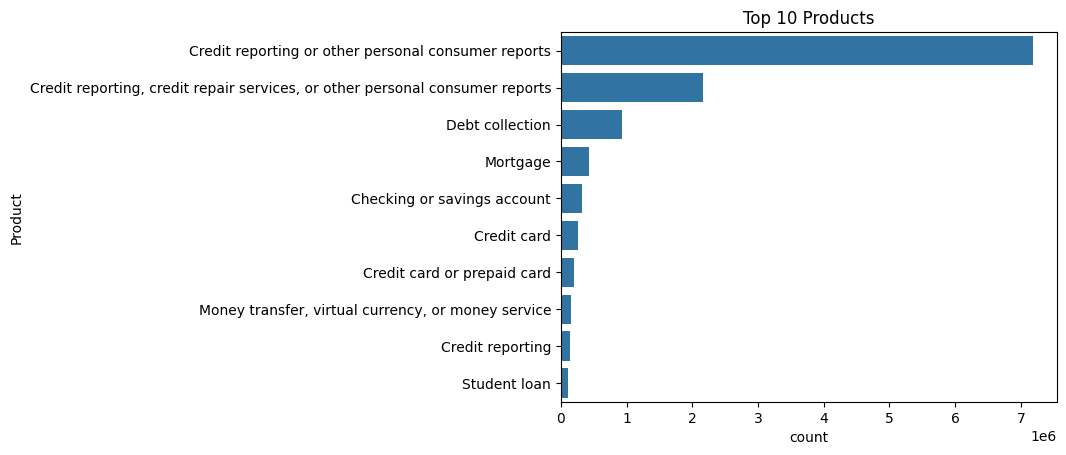

In [ ]:
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index[:10])
plt.title('Top 10 Products')

In [ ]:
# Boolean columns
df['Timely response?'].value_counts(normalize=True)
df['Consumer disputed?'].value_counts(normalize=True)

,proportion
Consumer disputed?,
No,0.806871
Yes,0.193129


# Bivariate Analysis

In [ ]:
# Product vs Issue
pd.crosstab(df['Product'], df['Issue'])

Issue,APR or interest rate,"Account opening, closing, or management",Account terms and changes,Adding money,Advertising,Advertising and marketing,"Advertising and marketing, including promotional offers","Advertising, marketing or disclosures",Application processing delay,"Application, originator, mortgage broker",...,Unexpected or other fees,Unexpected/Other fees,Unsolicited issuance of credit card,Using a debit or ATM card,Vehicle was damaged or destroyed the vehicle,Vehicle was repossessed or sold the vehicle,"Was approved for a loan, but didn't receive money","Was approved for a loan, but didn't receive the money",Written notification about debt,Wrong amount charged or received
Product,,,,,,,,,,,,,,,,,,,,,
Bank account or service,0,37960,0,0,0,0,0,0,0,0,...,0,0,0,6145,0,0,0,0,0,0
Checking or savings account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Consumer Loan,0,0,484,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit card,5506,0,0,0,0,2926,6168,0,540,0,...,0,0,1853,0,0,0,0,0,0,0
Credit card or prepaid card,0,0,0,0,352,0,9707,0,0,0,...,2884,0,0,0,0,0,0,0,0,0
Credit reporting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit reporting or other personal consumer reports,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Credit reporting, credit repair services, or other personal consumer reports",0,0,0,0,0,0,0,0,0,0,...,483,0,0,0,0,0,0,0,0,0
Debt collection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,190512,0


<Axes: xlabel='Timely response?', ylabel='count'>

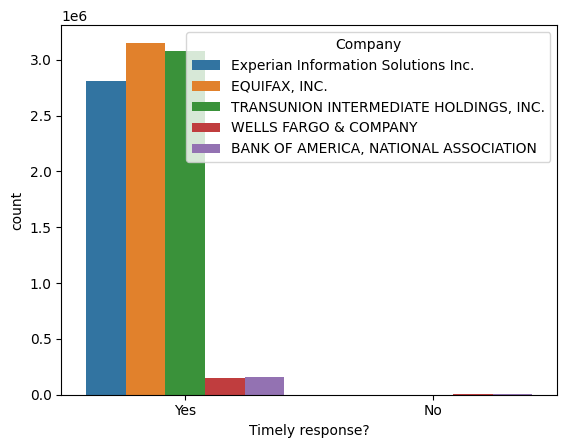

In [ ]:
# Company vs Timely Response
sns.countplot(x='Timely response?', hue='Company', data=df[df['Company'].isin(df['Company'].value_counts().index[:5])])

<Axes: xlabel='Submitted via', ylabel='count'>

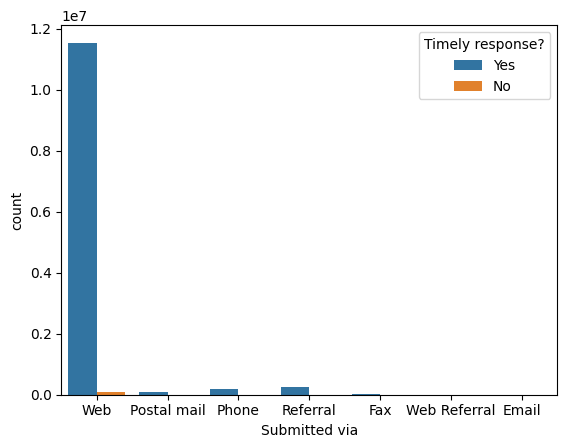

In [ ]:
# Submitted via vs Timely Response
sns.countplot(x='Submitted via', hue='Timely response?', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Credit reporting, credit repair services, or other personal consumer reports'),
  Text(1, 0, 'Credit reporting or other personal consumer reports'),
  Text(2, 0, 'Vehicle loan or lease'),
  Text(3, 0, 'Credit card'),
  Text(4, 0, 'Mortgage'),
  Text(5, 0, 'Credit card or prepaid card'),
  Text(6, 0, 'Debt collection'),
  Text(7, 0, 'Checking or savings account'),
  Text(8, 0, 'Prepaid card'),
  Text(9, 0, 'Student loan'),
  Text(10, 0, 'Payday loan, title loan, personal loan, or advance loan'),
  Text(11, 0, 'Money transfer, virtual currency, or money service'),
  Text(12, 0, 'Payday loan, title loan, or personal loan'),
  Text(13, 0, 'Debt or credit management'),
  Text(14, 0, 'Credit reporting'),
  Text(15, 0, 'Bank account or service'),
  Text(16, 0, 'Consumer Loan'),
  Text(17, 0, 'Payday loan'),
  Text(18, 0, 'Money transfers'),
  Text(19, 0, 'Other financial service'),
  Text(20, 0, 'Virtua

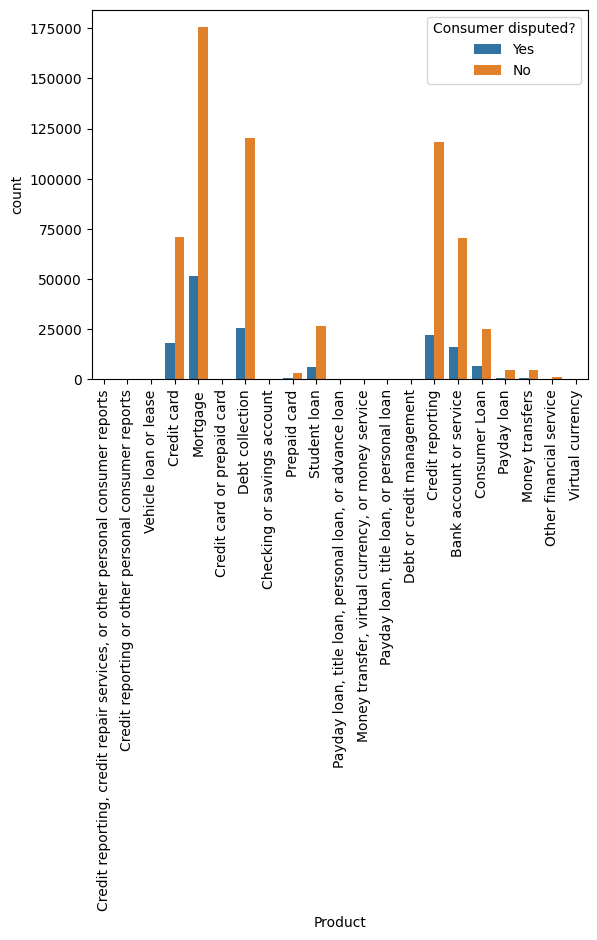

In [ ]:
# Consumer disputed vs Product
sns.countplot(x='Product', hue='Consumer disputed?', data=df)
plt.xticks(rotation=90)

In [ ]:
df['Date received'].dtype

dtype('O')

Text(0.5, 1.0, 'Top 10 States by Complaint Volume')

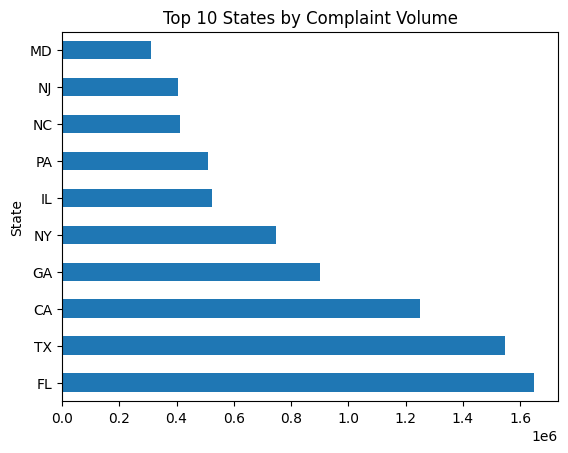

In [ ]:
# Plotting top 10 states by complaints
df['State'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 States by Complaint Volume')

<Axes: xlabel='narrative_length', ylabel='Count'>

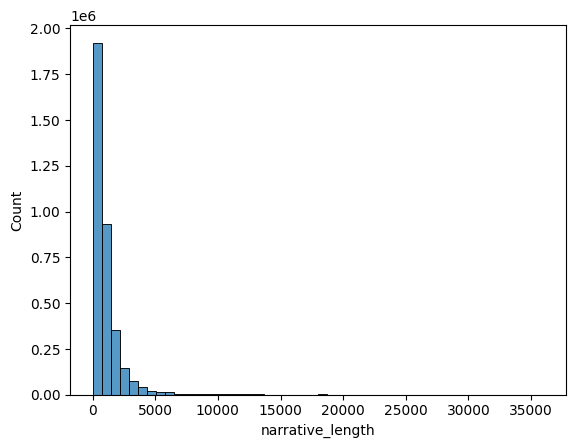

In [ ]:
# Histogram of narrative length
df['Consumer complaint narrative'].isnull().mean()
df['narrative_length'] = df['Consumer complaint narrative'].str.len()
sns.histplot(df['narrative_length'], bins=50)

In [ ]:
# This is our target column from the proposal
label_column = 'Product'

print(f"\nAnalyzing our label: '{label_column}'")
print(f"Total unique categories: {df[label_column].nunique()}")

print("\nClass distribution (the imbalance):")
print(df[label_column].value_counts())


Analyzing our label: 'Product'
Total unique categories: 21

Class distribution (the imbalance):
Product
Credit reporting or other personal consumer reports                             7187113
Credit reporting, credit repair services, or other personal consumer reports    2163844
Debt collection                                                                  929544
Mortgage                                                                         433092
Checking or savings account                                                      323613
Credit card                                                                      266845
Credit card or prepaid card                                                      206368
Money transfer, virtual currency, or money service                               160420
Credit reporting                                                                 140429
Student loan                                                                     116774
Bank account or


Generating imbalance plot...
Saved 'class_imbalance_plot.png'


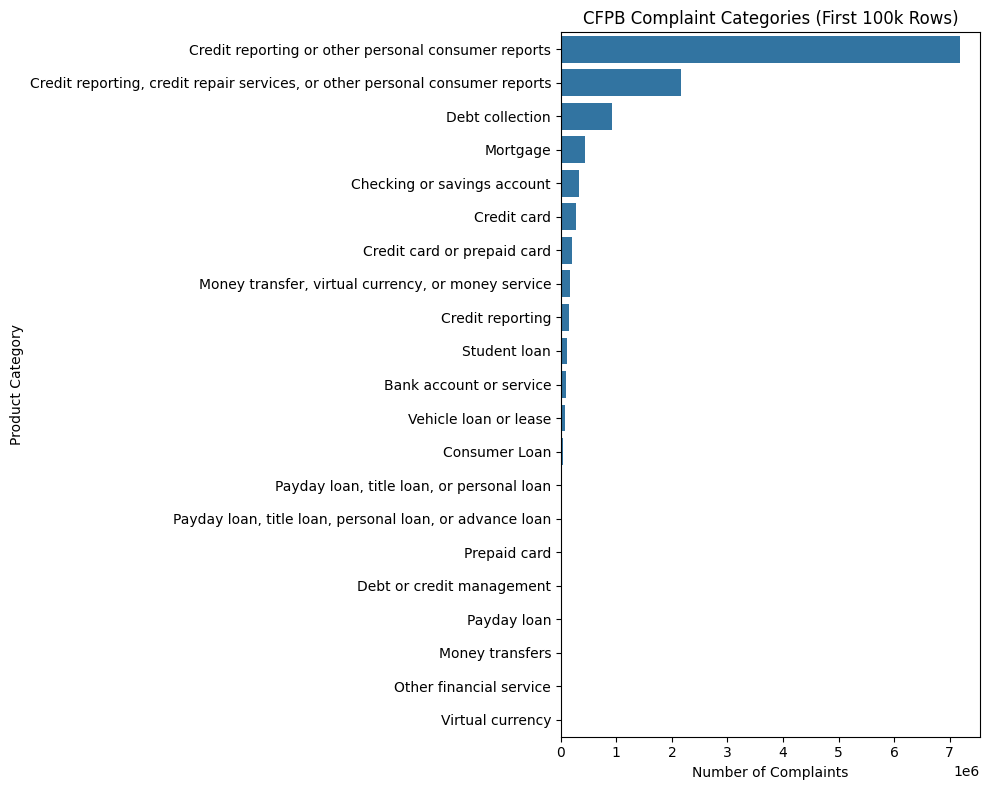

In [ ]:
# Visualizing the imbalance
print("\nGenerating imbalance plot...")
plt.figure(figsize=(10, 8))
sns.countplot(y=label_column, data=df, order=df[label_column].value_counts().index)
plt.title('CFPB Complaint Categories (First 100k Rows)')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.tight_layout()

plt.savefig('class_imbalance_plot.png')
print("Saved 'class_imbalance_plot.png'")
plt.show()

In [ ]:
# This is our feature column
feature_column = 'Consumer complaint narrative'

print(f"\nAnalyzing our feature: '{feature_column}'")

# How many complaints are missing the text?
missing_narratives = df[feature_column].isnull().sum()
print(f"Missing (NaN) narratives: {missing_narratives} ({(missing_narratives/len(df)*100):.2f}%)")

# For our model, we must drop rows where the text is missing.
df.dropna(subset=[feature_column], inplace=True)
print(f"Rows remaining after dropping missing narratives: {len(df)}")


Analyzing our feature: 'Consumer complaint narrative'
Missing (NaN) narratives: 8680911 (71.05%)
Rows remaining after dropping missing narratives: 3537241


count    3.537241e+06
mean     1.759054e+02
std      2.231179e+02
min      1.000000e+00
50%      1.150000e+02
75%      2.110000e+02
90%      3.640000e+02
95%      5.150000e+02
99%      1.021000e+03
max      6.469000e+03
Name: word_count, dtype: float64


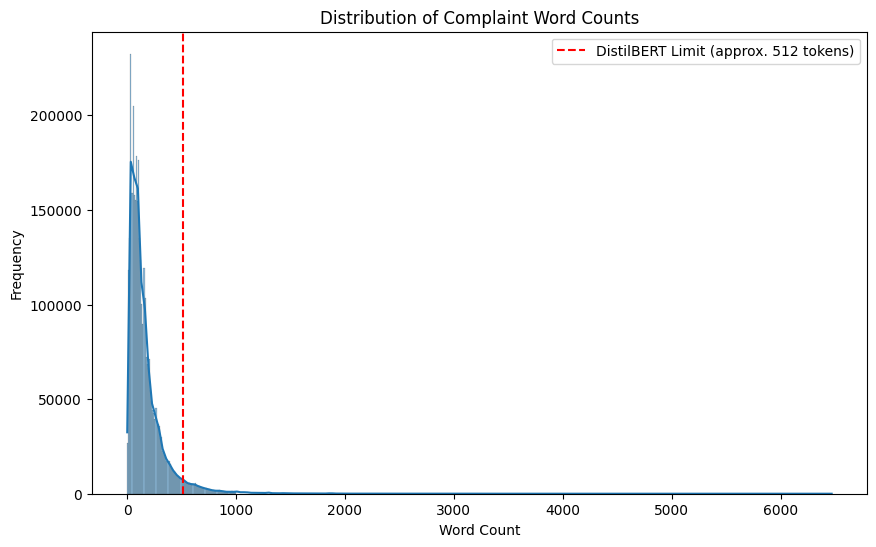

In [ ]:
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(x.split()))

print(df['word_count'].describe(percentiles=[.5, .75, .9, .95, .99]))

plt.figure(figsize=(10, 6))

sns.histplot(df['word_count'], bins=100, kde=True, binrange=(0, 1000))
plt.title('Distribution of Complaint Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(x=512, color='red', linestyle='--', label='DistilBERT Limit (approx. 512 tokens)')
plt.legend()
plt.savefig('word_count_distribution.png')
plt.show()

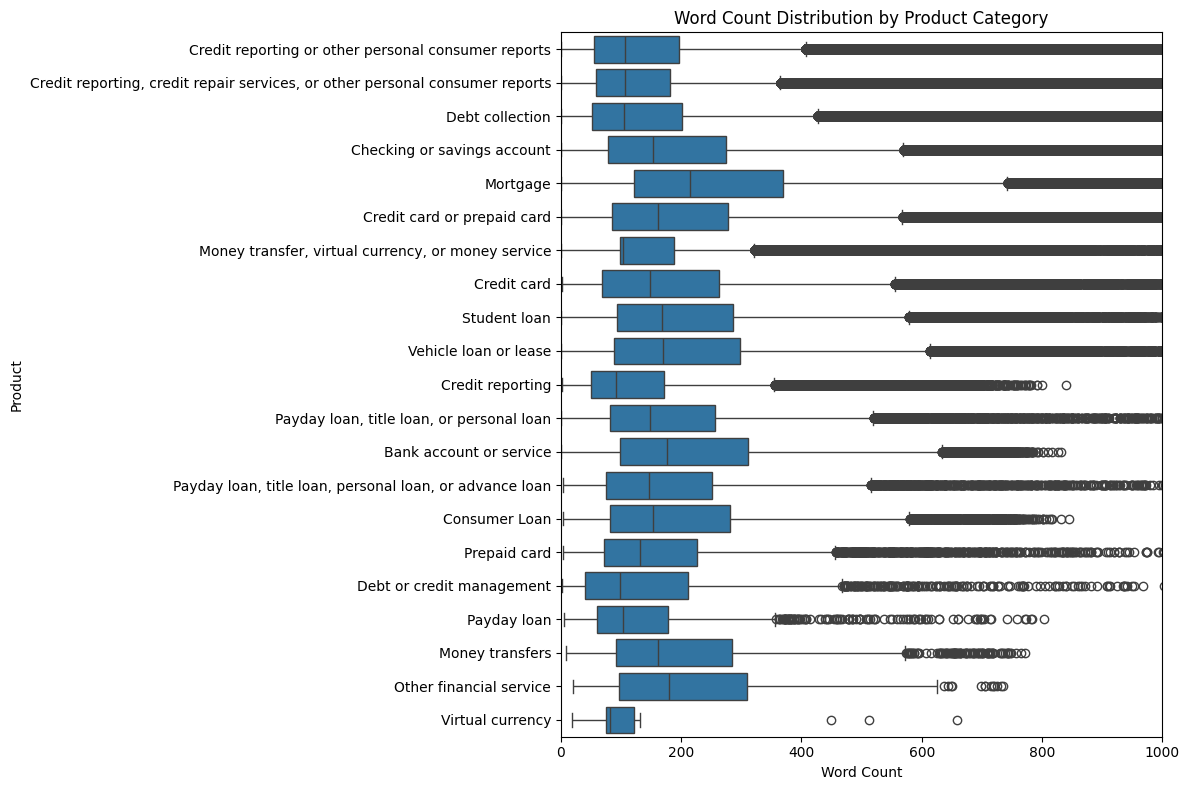

In [ ]:
# Plotting word count by category
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df,
    x='word_count',
    y='Product',
    order=df['Product'].value_counts().index
)
plt.title('Word Count Distribution by Product Category')
plt.xlabel('Word Count')
plt.ylabel('Product')
plt.xlim(0, 1000)
plt.tight_layout()
plt.savefig('word_count_by_category.png')
plt.show()

# N Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=10):
    vec = CountVectorizer(stop_words='english', ngram_range=(1, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
print(df['Product'].value_counts().index.tolist())

['Credit reporting or other personal consumer reports', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Checking or savings account', 'Mortgage', 'Credit card or prepaid card', 'Money transfer, virtual currency, or money service', 'Credit card', 'Student loan', 'Vehicle loan or lease', 'Credit reporting', 'Payday loan, title loan, or personal loan', 'Bank account or service', 'Payday loan, title loan, personal loan, or advance loan', 'Consumer Loan', 'Prepaid card', 'Debt or credit management', 'Payday loan', 'Money transfers', 'Other financial service', 'Virtual currency']


In [ ]:
# Checking top n-grams for similar categories

categories_to_check = [
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Credit reporting or other personal consumer reports',
    'Credit reporting',
    'Debt collection'
]

print("Running N-gram analysis to compare similar categories")

for category in categories_to_check:
    print(f"\n Top N-grams for: {category}")

    category_text = df[df['Product'] == category]['Consumer complaint narrative']

    if category_text.empty:
        print(f"SKIPPING: No complaints found for '{category}' in this sample.")
        continue

    top_terms = get_top_ngrams(category_text, n=15)
    print(top_terms)

Running N-gram analysis to compare similar categories

 Top N-grams for: Credit reporting, credit repair services, or other personal consumer reports
[('xxxx', np.int64(12725002)), ('xxxx xxxx', np.int64(8937744)), ('xx', np.int64(1916482)), ('credit', np.int64(1873967)), ('report', np.int64(1165026)), ('account', np.int64(1155152)), ('information', np.int64(1069343)), ('xx xx', np.int64(945904)), ('reporting', np.int64(937507)), ('consumer', np.int64(845829)), ('xx xxxx', np.int64(727018)), ('credit report', np.int64(594694)), ('section', np.int64(520967)), ('15', np.int64(517702)), ('accounts', np.int64(512093))]

 Top N-grams for: Credit reporting or other personal consumer reports
[('xxxx', np.int64(24554524)), ('xxxx xxxx', np.int64(19000023)), ('credit', np.int64(3888434)), ('report', np.int64(2650011)), ('information', np.int64(2505723)), ('xx', np.int64(2415153)), ('consumer', np.int64(2201408)), ('reporting', np.int64(2155247)), ('account', np.int64(2002667)), ('15', np.int64(

The "Credit" Categories are duplicates. All three "Credit reporting..." categories show the exact same top keywords: 'credit', 'report', 'information', 'account', and 'credit report'. This is definitive proof that they are the same category and are just labeled inconsistently in the database.

"Debt Collection" is Distinct (but related).The top keywords for Debt collection are 'debt' and 'collection'. However, it also contains the overlapping words 'credit', 'account', and 'report'. This confirms the core hypothesis of my project: Naive Bayes will likely get confused by these shared words, but a transformer (like DistilBERT) might understand the context better.

The "xxxx" Mystery is Solved The xxxx and xx tokens are clearly the most common "words." This is the CFPB's way of redacting personally identifiable information (PII) like names, account numbers, and dates. This is a critical discovery for your preprocessing step.

In [ ]:
# Getting the full value counts
class_counts = df['Product'].value_counts()
print("Full class counts:")
print(class_counts)

# Finding rare classes
threshold = 100
rare_classes = class_counts[class_counts < threshold]

if len(rare_classes) > 0:
    print(f"\n--- Rare Classes (fewer than {threshold} samples) ---")
    print(rare_classes)
    print("\nRecommendation: Consider merging these into an 'Other' category or dropping them.")
else:
    print(f"\nNo classes found with fewer than {threshold} samples.")

Full class counts:
Product
Credit reporting or other personal consumer reports                             1529489
Credit reporting, credit repair services, or other personal consumer reports     807271
Debt collection                                                                  385593
Checking or savings account                                                      158921
Mortgage                                                                         136429
Credit card or prepaid card                                                      108666
Money transfer, virtual currency, or money service                               106450
Credit card                                                                       99484
Student loan                                                                      57436
Vehicle loan or lease                                                             44889
Credit reporting                                                                  31587
Payda

Converted 'Date sent to company' to datetime object.


/tmp/ipython-input-2508519836.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = df['Product'].resample('M').count()


Resampled data by month.
Saved 'complaints_over_time.png'


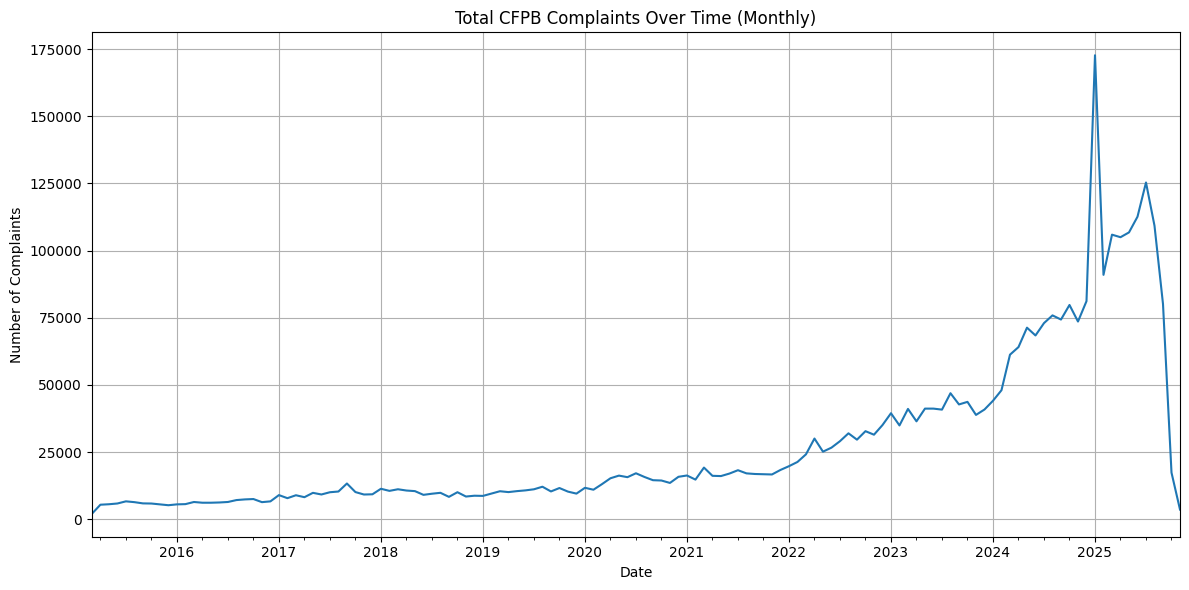

In [ ]:
date_column = 'Date sent to company'

try:
    df[date_column] = pd.to_datetime(df[date_column])
    print(f"Converted '{date_column}' to datetime object.")
except KeyError:
    print(f"Error: Column '{date_column}' not found.")
    raise

df.set_index(date_column, inplace=True)

# 'M' stands for Month
monthly_complaints = df['Product'].resample('M').count()

print("Resampled data by month.")

plt.figure(figsize=(12, 6))
monthly_complaints.plot()
plt.title('Total CFPB Complaints Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.tight_layout()
plt.savefig('complaints_over_time.png')
print("Saved 'complaints_over_time.png'")
plt.show()